In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns for better readability
data.columns = ['label', 'text']

# Convert labels to binary (spam: 1, ham: 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Shuffle the data to avoid any biases in the order
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check for missing values
data.isnull().sum()

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)



In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Create a pipeline with CountVectorizer and Multinomial Naive Bayes Classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [4]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.9811659192825112
Confusion Matrix:
[[940   9]
 [ 12 154]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.94      0.93      0.94       166

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [5]:
# You can use the trained model to predict on new emails
new_emails = ["Claim your prize now!", "Hi John, how are you?"]

# Make predictions on new emails
new_predictions = model.predict(new_emails)

# Print the predictions
for email, prediction in zip(new_emails, new_predictions):
    if prediction == 1:
        print(f"'{email}' is predicted as SPAM.")
    else:
        print(f"'{email}' is predicted as HAM.")


'Claim your prize now!' is predicted as SPAM.
'Hi John, how are you?' is predicted as HAM.


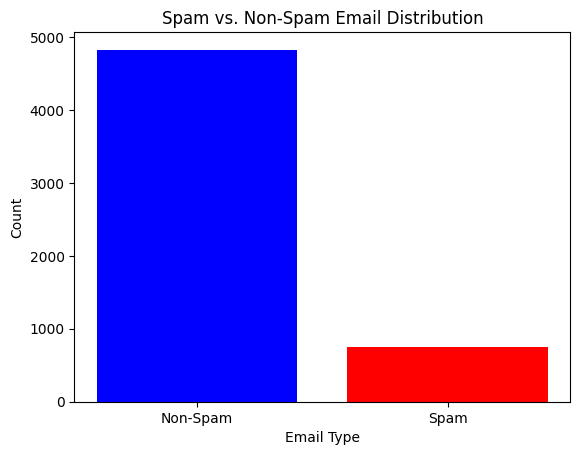

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

spam_count = data['label'].value_counts()
plt.bar(['Non-Spam', 'Spam'], spam_count, color=['blue', 'red'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Spam vs. Non-Spam Email Distribution')
plt.show()


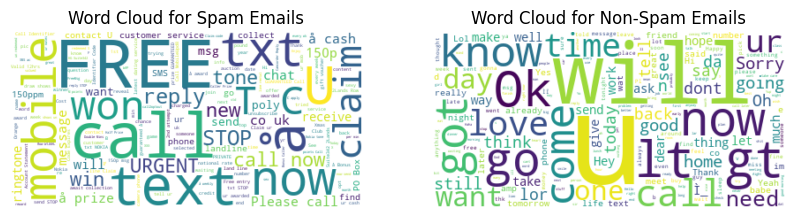

In [19]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('spam.csv', encoding='latin-1')

# Extract text data from the 'v2' column for spam and non-spam emails
spam_text = df[df['v1'] == 'spam']['v2'].tolist()
non_spam_text = df[df['v1'] == 'ham']['v2'].tolist()

# Create WordClouds for spam and non-spam emails
spam_wordcloud = WordCloud(background_color='white').generate(' '.join(spam_text))
non_spam_wordcloud = WordCloud(background_color='white').generate(' '.join(non_spam_text))

# Plot the WordClouds side by side
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')

plt.subplot(1, 2, 2)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails')

plt.show()


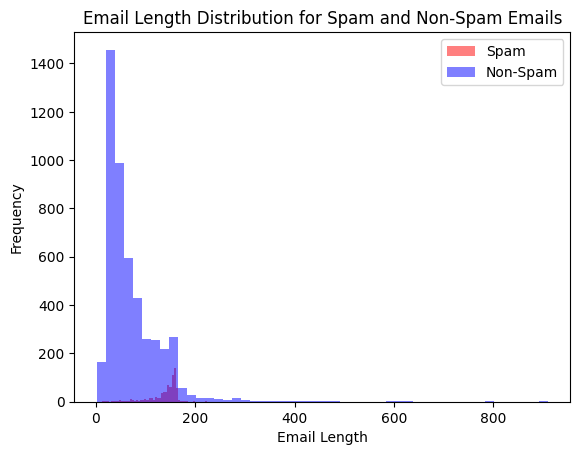

In [21]:

spam_lengths = [len(email) for email in spam_text]
non_spam_lengths = [len(email) for email in non_spam_text]

# Now you can plot the histogram
import matplotlib.pyplot as plt

plt.hist(spam_lengths, bins=50, alpha=0.5, color='red', label='Spam')
plt.hist(non_spam_lengths, bins=50, alpha=0.5, color='blue', label='Non-Spam')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Email Length Distribution for Spam and Non-Spam Emails')
plt.legend()
plt.show()
